In [448]:
import sys

import numpy as np              
import pandas as pd             
import matplotlib.pyplot as plt  

from pandas               import DataFrame
from pandas               import read_csv
from numpy                import array
from numpy                import random
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
from matplotlib           import pyplot
from sklearn.linear_model import LinearRegression 
from sklearn.metrics      import r2_score 

This python project contains data cleaning, preparation and visualization to identify factors impacting southern europe housing price trends.

In [449]:
#Define the directory

directory="C:/Users/dwijayaweera/Documents/Financial Programming/Assignment_DinuWijayaweera/data/factors/"

In [450]:
#### References ####
# https://dash.plot.ly/getting-started
# IESEG FP Python notebooks

#### Data Sources ####
# Eurostat https://ec.europa.eu/eurostat/web/regions/data/main-tables
# https://data.oecd.org/price/housing-prices.htm


# Read demographic data

In [451]:
#Read population data
population=pd.read_excel(directory+"population.xlsx", index=False)

In [452]:
population.head()

,LOCATION,TIME,POPULATION
0,Greece,2005,10969912
1,Greece,2006,11004716
2,Greece,2007,11036008
3,Greece,2008,11060937
4,Greece,2009,11094745


In [453]:
#Read female employment data
female_employmentrate=pd.read_csv(directory + "employment rate_female.csv")
female_employmentrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
LOCATION     70 non-null object
SUBJECT      70 non-null object
MEASURE      70 non-null object
FREQUENCY    70 non-null object
TIME         70 non-null int64
Value        70 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.4+ KB


In [454]:
#Rename the value column 
female_employmentrate = female_employmentrate.rename(columns = {'Value':'female_employment_rate'})

In [455]:
#Drop unwanted columns
female_employmentrate = female_employmentrate.drop(columns=["SUBJECT", "MEASURE", "FREQUENCY"])

female_employmentrate.head(n=10)

,LOCATION,TIME,female_employment_rate
0,GRC,2005,45.975
1,GRC,2006,47.300
2,GRC,2007,47.675
3,GRC,2008,48.575
4,GRC,2009,48.900
5,GRC,2010,48.025
6,GRC,2011,44.975
7,GRC,2012,41.725
8,GRC,2013,39.900
9,GRC,2014,41.100


In [456]:
#Renaming locations by replacing codes with the location
female_employmentrate['LOCATION']=np.where((female_employmentrate['LOCATION']== 'GRC'),"Greece", female_employmentrate['LOCATION'])
female_employmentrate['LOCATION']=np.where((female_employmentrate['LOCATION']== 'SVN'),"Slovenia", female_employmentrate['LOCATION'])
female_employmentrate['LOCATION']=np.where((female_employmentrate['LOCATION']== 'ITA'),"Italy", female_employmentrate['LOCATION'])
female_employmentrate['LOCATION']=np.where((female_employmentrate['LOCATION']== 'PRT'),"Portugal", female_employmentrate['LOCATION'])
female_employmentrate['LOCATION']=np.where((female_employmentrate['LOCATION']== 'ESP'),"Spain", female_employmentrate['LOCATION'])

female_employmentrate['LOCATION'].unique()

array(['Greece', 'Italy', 'Portugal', 'Spain', 'Slovenia'], dtype=object)

In [457]:
#Read male employment data
male_employment_rate=pd.read_csv(directory + "employment rate_men.csv")
male_employment_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
LOCATION     70 non-null object
SUBJECT      70 non-null object
MEASURE      70 non-null object
FREQUENCY    70 non-null object
TIME         70 non-null int64
Value        70 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.4+ KB


In [458]:
#Renaming locations by replacing codes with the location
male_employment_rate['LOCATION']=np.where((male_employment_rate['LOCATION']== 'GRC'),"Greece", male_employment_rate['LOCATION'])
male_employment_rate['LOCATION']=np.where((male_employment_rate['LOCATION']== 'SVN'),"Slovenia", male_employment_rate['LOCATION'])
male_employment_rate['LOCATION']=np.where((male_employment_rate['LOCATION']== 'ITA'),"Italy", male_employment_rate['LOCATION'])
male_employment_rate['LOCATION']=np.where((male_employment_rate['LOCATION']== 'PRT'),"Portugal", male_employment_rate['LOCATION'])
male_employment_rate['LOCATION']=np.where((male_employment_rate['LOCATION']== 'ESP'),"Spain", male_employment_rate['LOCATION'])

male_employment_rate['LOCATION'].unique()

array(['Greece', 'Italy', 'Portugal', 'Spain', 'Slovenia'], dtype=object)

In [459]:
#Rename the value column 

male_employment_rate = male_employment_rate.rename(columns = {'Value':'male_employment_rate'})

In [460]:
#Drop unwanted columns
male_employment_rate = male_employment_rate.drop(columns=["SUBJECT", "MEASURE", "FREQUENCY"])


male_employment_rate.head()

,LOCATION,TIME,male_employment_rate
0,Greece,2005,73.425
1,Greece,2006,73.925
2,Greece,2007,74.200
3,Greece,2008,74.375
4,Greece,2009,72.950


# Merge demographic data

In [461]:
#Merging the files on both location and time
demographics=pd.merge(male_employment_rate,female_employmentrate, how='left',on=["LOCATION", "TIME"])


demographics.head()

,LOCATION,TIME,male_employment_rate,female_employment_rate
0,Greece,2005,73.425,45.975
1,Greece,2006,73.925,47.300
2,Greece,2007,74.200,47.675
3,Greece,2008,74.375,48.575
4,Greece,2009,72.950,48.900


In [462]:
#Merging the files on both location and time
demographics=pd.merge(demographics,population, how='left',on=["LOCATION", "TIME"])


demographics.head()

,LOCATION,TIME,male_employment_rate,female_employment_rate,POPULATION
0,Greece,2005,73.425,45.975,10969912
1,Greece,2006,73.925,47.300,11004716
2,Greece,2007,74.200,47.675,11036008
3,Greece,2008,74.375,48.575,11060937
4,Greece,2009,72.950,48.900,11094745


# Reading economic data

In [463]:
#Read inflation data
inflation=pd.read_csv(directory + "inflation rate_yearly.csv")
inflation.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,GRC,CPI,TOT,AGRWTH,A,2005,3.545073,NaN
1,GRC,CPI,TOT,AGRWTH,A,2006,3.195946,NaN
2,GRC,CPI,TOT,AGRWTH,A,2007,2.895001,NaN
3,GRC,CPI,TOT,AGRWTH,A,2008,4.152796,NaN
4,GRC,CPI,TOT,AGRWTH,A,2009,1.210074,NaN


In [464]:
#Renaming value column
inflation = inflation.rename(columns = {'Value':'Inflation'})

In [465]:
#Renaming locations by replacing codes with the location
inflation['LOCATION']=np.where((inflation['LOCATION']== 'GRC'),"Greece", inflation['LOCATION'])
inflation['LOCATION']=np.where((inflation['LOCATION']== 'SVN'),"Slovenia", inflation['LOCATION'])
inflation['LOCATION']=np.where((inflation['LOCATION']== 'ITA'),"Italy", inflation['LOCATION'])
inflation['LOCATION']=np.where((inflation['LOCATION']== 'PRT'),"Portugal", inflation['LOCATION'])
inflation['LOCATION']=np.where((inflation['LOCATION']== 'ESP'),"Spain", inflation['LOCATION'])

In [466]:
#Drop unwanted columns
inflation = inflation.drop(columns=["INDICATOR", "SUBJECT", "MEASURE","Flag Codes", "FREQUENCY"])
inflation.head()

,LOCATION,TIME,Inflation
0,Greece,2005,3.545073
1,Greece,2006,3.195946
2,Greece,2007,2.895001
3,Greece,2008,4.152796
4,Greece,2009,1.210074


In [467]:
# Read interest data
longTermIntRates = pd.read_csv(directory + "long_term_intrestrates.csv")
longTermIntRates.head()


,LOCATION,Country,TIME,Value
0,Greece,Greece,2005,3.59
1,Greece,Greece,2006,4.07
2,Greece,Greece,2007,4.50
3,Greece,Greece,2008,4.80
4,Greece,Greece,2009,5.17


In [468]:
# Renaming value column
longTermIntRates = longTermIntRates.rename(columns={'Value': 'long_term_interest_rate'})


In [469]:
# Drop unwanted columns
longTermIntRates = longTermIntRates.drop(columns=["Country"])
longTermIntRates.head()

,LOCATION,TIME,long_term_interest_rate
0,Greece,2005,3.59
1,Greece,2006,4.07
2,Greece,2007,4.50
3,Greece,2008,4.80
4,Greece,2009,5.17


In [470]:
#Read exchange rates data
exchange_rates=pd.read_csv(directory + "Exchange rates_yearly.csv")
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
LOCATION      95 non-null object
INDICATOR     95 non-null object
SUBJECT       95 non-null object
MEASURE       95 non-null object
FREQUENCY     95 non-null object
TIME          95 non-null int64
Value         95 non-null float64
Flag Codes    0 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.0+ KB


In [471]:
#Rename value to exchange rates 

exchange_rates = exchange_rates.rename(columns = {'Value':'exchange_rate'})

In [472]:
#Renaming locations by replacing codes with the location
exchange_rates['LOCATION']=np.where((exchange_rates['LOCATION']== 'GRC'),"Greece", exchange_rates['LOCATION'])
exchange_rates['LOCATION']=np.where((exchange_rates['LOCATION']== 'SVN'),"Slovenia", exchange_rates['LOCATION'])
exchange_rates['LOCATION']=np.where((exchange_rates['LOCATION']== 'ITA'),"Italy", exchange_rates['LOCATION'])
exchange_rates['LOCATION']=np.where((exchange_rates['LOCATION']== 'PRT'),"Portugal", exchange_rates['LOCATION'])
exchange_rates['LOCATION']=np.where((exchange_rates['LOCATION']== 'ESP'),"Spain", exchange_rates['LOCATION'])

exchange_rates['LOCATION'].unique()

array(['Greece', 'Italy', 'Portugal', 'Spain', 'Slovenia'], dtype=object)

In [473]:
#Drop unwanted columns
exchange_rates = exchange_rates.drop(columns=["INDICATOR","SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"])

exchange_rates.head()

,LOCATION,TIME,exchange_rate
0,Greece,2000,1.072336
1,Greece,2001,1.117510
2,Greece,2002,1.062552
3,Greece,2003,0.886034
4,Greece,2004,0.805365


In [474]:
#Read tax on goods
taxes_goods=pd.read_csv(directory + "taxes on goods_yearly.csv")

#Rename value to taxes_goods 
taxes_goods = taxes_goods.rename(columns = {'Value':'taxes_goods'})
taxes_goods.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,taxes_goods,Flag Codes
0,GRC,TAXGOODSERV,TOT,PC_GDP,A,2000,12.127,NaN
1,GRC,TAXGOODSERV,TOT,PC_GDP,A,2001,12.305,NaN
2,GRC,TAXGOODSERV,TOT,PC_GDP,A,2002,11.865,NaN
3,GRC,TAXGOODSERV,TOT,PC_GDP,A,2003,11.023,NaN
4,GRC,TAXGOODSERV,TOT,PC_GDP,A,2004,10.638,NaN


In [475]:
#Drop unwanted columns
taxes_goods = taxes_goods.drop(columns=["INDICATOR","SUBJECT","MEASURE", "FREQUENCY", "Flag Codes"])
taxes_goods.head()


,LOCATION,TIME,taxes_goods
0,GRC,2000,12.127
1,GRC,2001,12.305
2,GRC,2002,11.865
3,GRC,2003,11.023
4,GRC,2004,10.638


In [476]:
#Renaming locations by replacing codes with the location
taxes_goods['LOCATION']=np.where((taxes_goods['LOCATION']== 'GRC'),"Greece", taxes_goods['LOCATION'])
taxes_goods['LOCATION']=np.where((taxes_goods['LOCATION']== 'SVN'),"Slovenia", taxes_goods['LOCATION'])
taxes_goods['LOCATION']=np.where((taxes_goods['LOCATION']== 'ITA'),"Italy", taxes_goods['LOCATION'])
taxes_goods['LOCATION']=np.where((taxes_goods['LOCATION']== 'PRT'),"Portugal", taxes_goods['LOCATION'])
taxes_goods['LOCATION']=np.where((taxes_goods['LOCATION']== 'ESP'),"Spain", taxes_goods['LOCATION'])

taxes_goods['LOCATION'].unique()

array(['Greece', 'Italy', 'Portugal', 'Spain', 'Slovenia'], dtype=object)

# Merge economic data


In [477]:
#Merging the files on both location and time
economic=pd.merge(inflation,exchange_rates, how='left',on=["LOCATION", "TIME"])


economic.head()

,LOCATION,TIME,Inflation,exchange_rate
0,Greece,2005,3.545073,0.804120
1,Greece,2006,3.195946,0.797141
2,Greece,2007,2.895001,0.730638
3,Greece,2008,4.152796,0.682675
4,Greece,2009,1.210074,0.719843


In [478]:
#Merging the files on both location and time
economic=pd.merge(economic,taxes_goods, how='left',on=["LOCATION", "TIME"])


In [479]:
economic = pd.merge(economic, longTermIntRates, how='left', on=["LOCATION", "TIME"])
economic.head()

,LOCATION,TIME,Inflation,exchange_rate,taxes_goods,long_term_interest_rate
0,Greece,2005,3.545073,0.804120,10.892,3.59
1,Greece,2006,3.195946,0.797141,11.108,4.07
2,Greece,2007,2.895001,0.730638,11.417,4.50
3,Greece,2008,4.152796,0.682675,11.219,4.80
4,Greece,2009,1.210074,0.719843,10.966,5.17


# Reading property data

In [480]:
#Read and investigate tax on property
taxes_property=pd.read_csv(directory + "taxes on property_yearly.csv")
#Rename value to meaningful column name
taxes_property = taxes_property.rename(columns = {'Value':'taxes_property'})
taxes_property.head()


taxes_property.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
LOCATION          65 non-null object
INDICATOR         65 non-null object
MEASURE           65 non-null object
FREQUENCY         65 non-null object
TIME              65 non-null int64
taxes_property    65 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.1+ KB


In [481]:
#Dropping unwanted columns
taxes_property = taxes_property.drop(columns=["INDICATOR","MEASURE", "FREQUENCY"])
taxes_property.head()

,LOCATION,TIME,taxes_property
0,GRC,2005,1.301
1,GRC,2006,1.618
2,GRC,2007,1.659
3,GRC,2008,1.690
4,GRC,2009,1.868


In [482]:
#Renaming locations by replacing codes with the location
taxes_property['LOCATION']=np.where((taxes_property['LOCATION']== 'GRC'),"Greece", taxes_property['LOCATION'])
taxes_property['LOCATION']=np.where((taxes_property['LOCATION']== 'SVN'),"Slovenia", taxes_property['LOCATION'])
taxes_property['LOCATION']=np.where((taxes_property['LOCATION']== 'ITA'),"Italy", taxes_property['LOCATION'])
taxes_property['LOCATION']=np.where((taxes_property['LOCATION']== 'PRT'),"Portugal", taxes_property['LOCATION'])
taxes_property['LOCATION']=np.where((taxes_property['LOCATION']== 'ESP'),"Spain", taxes_property['LOCATION'])

taxes_property['LOCATION'].unique()

array(['Greece', 'Italy', 'Portugal', 'Spain', 'Slovenia'], dtype=object)

In [483]:
#Read and investigate tax on property
rent_price=pd.read_csv(directory + "Rent prices_yearly.csv")

#Rename value to meaningful column name
rent_price = rent_price.rename(columns = {'Value':'Rent_price_changes'})
rent_price.head()
rent_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 4 columns):
LOCATION              459 non-null object
Country               459 non-null object
TIME                  459 non-null float64
Rent_price_changes    459 non-null float64
dtypes: float64(2), object(2)
memory usage: 73.4+ KB


In [484]:
#Dropping unwanted columns
rent_price = rent_price.drop(columns=["Country"])
rent_price.head()

,LOCATION,TIME,Rent_price_changes
0,ITA,2005.0,108.225783
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [485]:
#Renaming locations by replacing codes with the location
rent_price['LOCATION']=np.where((rent_price['LOCATION']== 'GRC'),"Greece", rent_price['LOCATION'])
rent_price['LOCATION']=np.where((rent_price['LOCATION']== 'SVN'),"Slovenia", rent_price['LOCATION'])
rent_price['LOCATION']=np.where((rent_price['LOCATION']== 'ITA'),"Italy", rent_price['LOCATION'])
rent_price['LOCATION']=np.where((rent_price['LOCATION']== 'PRT'),"Portugal", rent_price['LOCATION'])
rent_price['LOCATION']=np.where((rent_price['LOCATION']== 'ESP'),"Spain", rent_price['LOCATION'])

rent_price.head()

,LOCATION,TIME,Rent_price_changes
0,Italy,2005.0,108.225783
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [486]:
rent_price = rent_price.dropna()

In [487]:
rent_price['TIME']=pd.to_numeric(rent_price['TIME'],downcast='integer')

In [492]:
rent_price.head()

,LOCATION,TIME,Rent_price_changes
0,Italy,2005,108.225783
5,Italy,2006,115.191197
10,Italy,2007,121.130252
15,Italy,2008,123.177099
20,Italy,2009,118.646535


In [493]:
#Read house prices data
realhouseprices=pd.read_csv(directory + "real housing prices.csv")
realhouseprices.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,GRC,HOUSECOST,REAL,IDX2015,A,2005,156.203316,NaN
1,GRC,HOUSECOST,REAL,IDX2015,A,2006,170.969527,NaN
2,GRC,HOUSECOST,REAL,IDX2015,A,2007,175.149875,NaN
3,GRC,HOUSECOST,REAL,IDX2015,A,2008,170.377671,NaN
4,GRC,HOUSECOST,REAL,IDX2015,A,2009,161.493011,NaN


In [494]:
#Dropping unwanted columns

realhouseprices = realhouseprices.drop(columns=["INDICATOR","SUBJECT","MEASURE", "FREQUENCY", "Flag Codes"])


In [495]:
realhouseprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
LOCATION    68 non-null object
TIME        68 non-null int64
Value       68 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ KB


In [496]:
#Renaming locations by replacing codes with the location

realhouseprices['LOCATION']=np.where((realhouseprices['LOCATION']== 'GRC'),"Greece", realhouseprices['LOCATION'])
realhouseprices['LOCATION']=np.where((realhouseprices['LOCATION']== 'SVN'),"Slovenia", realhouseprices['LOCATION'])
realhouseprices['LOCATION']=np.where((realhouseprices['LOCATION']== 'ITA'),"Italy", realhouseprices['LOCATION'])
realhouseprices['LOCATION']=np.where((realhouseprices['LOCATION']== 'PRT'),"Portugal", realhouseprices['LOCATION'])
realhouseprices['LOCATION']=np.where((realhouseprices['LOCATION']== 'ESP'),"Spain", realhouseprices['LOCATION'])

realhouseprices['LOCATION'].unique()

array(['Greece', 'Italy', 'Portugal', 'Spain', 'Slovenia'], dtype=object)

In [497]:
#Rename value to meaningful column name, real house prices means house prices which does not include inflation
realhouseprices = realhouseprices.rename(columns = {'Value':'realhouseprices'})

# Merging property related data

In [498]:
housing_factors=pd.merge(taxes_property,realhouseprices, how='left',on=["LOCATION", "TIME"])
housing_factors.head(n=20)

,LOCATION,TIME,taxes_property,realhouseprices
0,Greece,2005,1.301,156.203316
1,Greece,2006,1.618,170.969527
2,Greece,2007,1.659,175.149875
3,Greece,2008,1.690,170.377671
4,Greece,2009,1.868,161.493011
5,Greece,2010,1.655,149.031732
6,Greece,2011,2.477,137.654472
7,Greece,2012,2.705,120.921610
8,Greece,2013,3.154,109.667888
9,Greece,2014,2.873,103.651960


# Merge all factors

In [499]:
all_factors=pd.merge(demographics,economic, how='left',on=["LOCATION", "TIME"])


In [500]:
all_factors=pd.merge(all_factors,housing_factors, how='left',on=["LOCATION", "TIME"])
all_factors.head(n=10)

,LOCATION,TIME,male_employment_rate,female_employment_rate,POPULATION,Inflation,exchange_rate,taxes_goods,long_term_interest_rate,taxes_property,realhouseprices
0,Greece,2005,73.425,45.975,10969912,3.545073,0.804120,10.892,3.59,1.301,156.203316
1,Greece,2006,73.925,47.300,11004716,3.195946,0.797141,11.108,4.07,1.618,170.969527
2,Greece,2007,74.200,47.675,11036008,2.895001,0.730638,11.417,4.50,1.659,175.149875
3,Greece,2008,74.375,48.575,11060937,4.152796,0.682675,11.219,4.80,1.690,170.377671
4,Greece,2009,72.950,48.900,11094745,1.210074,0.719843,10.966,5.17,1.868,161.493011
5,Greece,2010,70.350,48.025,11119289,4.712982,0.755045,12.251,9.09,1.655,149.031732
6,Greece,2011,65.350,44.975,11123392,3.329870,0.719355,13.159,15.75,2.477,137.654472
7,Greece,2012,60.075,41.725,11086406,1.501520,0.778294,13.275,22.50,2.705,120.921610
8,Greece,2013,57.900,39.900,11003615,-0.922165,0.753159,13.748,10.05,3.154,109.667888
9,Greece,2014,57.975,41.100,10926807,-1.311209,0.753731,13.901,6.93,2.873,103.651960


In [501]:
#remove null values and replace with mean/median/avg - TO DO

mean_tg=all_factors['taxes_goods'].groupby(all_factors['LOCATION']).mean()
mean_tg



LOCATION
Greece      12.846000
Italy       11.178538
Portugal    13.028077
Slovenia    13.803846
Spain        9.049538
Name: taxes_goods, dtype: float64

In [502]:
mean_tp=all_factors['taxes_property'].groupby(all_factors['LOCATION']).mean()
mean_tp

LOCATION
Greece      2.340231
Italy       2.396308
Portugal    1.186692
Slovenia    0.607077
Spain       2.493846
Name: taxes_property, dtype: float64

In [503]:
mean_prices=all_factors['realhouseprices'].groupby(all_factors['LOCATION']).mean()
mean_prices

LOCATION
Greece      134.628209
Italy       118.316671
Portugal    110.169391
Slovenia    116.108947
Spain       126.678277
Name: realhouseprices, dtype: float64

In [504]:
#all_factors['taxes_goods']=all_factors['taxes_goods'].replace(np.nan, 'NA')

In [505]:
#all_factors.loc[all_factors['taxes_goods'].isna(),'taxes_goods']=mean_tg

#all_factors['taxes_property']=np.where((all_factors['taxes_property'].isna() & all_factors['LOCATION']== 'Greece'),"12.846000", all_factors['taxes_property'])
#all_factors['taxes_property']=np.where((all_factors['taxes_property'].isna() & all_factors['LOCATION']== 'Slovenia'),"13.803846", all_factors['taxes_property'])
#all_factors['taxes_property']=np.where((all_factors['taxes_property'].isna() & all_factors['LOCATION']== 'Italy'),"11.178538", all_factors['taxes_property'])
#all_factors['taxes_property']=np.where((all_factors['taxes_property'].isna() & all_factors['LOCATION']== 'Portugal'),"13.028077", all_factors['taxes_property'])
#all_factors['taxes_property']=np.where((all_factors['taxes_property'].isna() & all_factors['LOCATION']== 'Spain'),"9.049538", all_factors['taxes_property'])


In [506]:
#assigning mean to taxes_goods null/ nan values
nanIndex = all_factors.index[all_factors['taxes_goods'].isnull()]
k=all_factors.at[j,'taxes_goods']
for j in nanIndex:
    print(j)
    all_factors.at[j,'taxes_goods'] = mean_tg[all_factors.iloc[j]['LOCATION']]
    #print(all_factors.iloc[j])

13
27
41
55
69


In [507]:
#assigning mean to taxes_property null/ nan values
nanIndex = all_factors.index[all_factors['taxes_property'].isnull()]
for i in nanIndex:
    print(i)
    all_factors.at[i,'taxes_property'] = mean_tp[all_factors.iloc[i]['LOCATION']]
    #print(all_factors.iloc[i])

13
27
41
55
69


In [508]:
#assigning mean to prices to null/ nan values
nanIndex = all_factors.index[all_factors['realhouseprices'].isnull()]
for i in nanIndex:
    print(i)
    all_factors.at[i,'realhouseprices'] = mean_prices[all_factors.iloc[i]['LOCATION']]
    #print(all_factors.iloc[i])

13
27
41
55
56
57
69


In [509]:
#all_factors

Checking linear regression with some data

In [510]:

# Set up the model
reg_md = LinearRegression()

In [511]:
# Prepare the data
X = all_factors.POPULATION.values.reshape(-1, 1)  # Transform predictor to 2D array
y = all_factors.realhouseprices.values 

In [512]:
#Fit to the regression model
reg_md.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [513]:
# Make prediction on the training data
y_pred = reg_md.predict(X)
y_pred[:5]

array([120.72434915, 120.72542044, 120.72638363, 120.72715096,
       120.72819159])

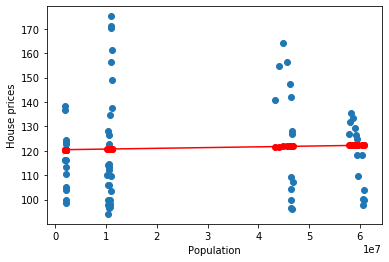

In [514]:
# Plot the model together with the data 

# The data
plt.scatter(x=all_factors.POPULATION, y=all_factors.realhouseprices)
plt.xlabel('Population')
plt.ylabel('House prices')

# The linear regression model
x_plot = np.arange(min(all_factors.POPULATION), max(all_factors.POPULATION))  # Create value for x-axis
y_plot = reg_md.intercept_ + reg_md.coef_[0] * x_plot  # Create value for y-axis using the linear model
plt.plot(x_plot, y_plot, '-', color='red')

# Predict values on train data
plt.scatter(all_factors.POPULATION, y_pred, color='red')

plt.show()

# Dashboards

In [ ]:
#install recent version of dash
pip install dash==1.7.0 

In [515]:
import dash
import dash_core_components  as dcc
import dash_html_components  as html
import plotly.offline        as py
import plotly.graph_objs     as go
import dash.dependencies 

from dash.dependencies import Input, Output
from datetime                              import datetime
from plotly.offline                        import init_notebook_mode, plot, iplot

 Data dashboard created with Plotly Dash. This dashboard will be loaded in http://127.0.0.1:8050/

In [ ]:
# **********************************************
# **************Data Dashboard******************
# **********************************************

app = dash.Dash(__name__, 
       external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
)

app.layout = html.Div([

    html.H1(children='Southern Europe Pricing Trends'),

    html.Div(children='''
          Use the dropdown menu to display the charts
    '''),

    html.Div([
        html.Div([
            dcc.Dropdown(
                id='yaxis',
                options=[{'label': i, 'value': i} for i in all_factors['LOCATION'].unique()],
                value='Country'
            )
        ], style={'width': '40%'})
    ]),

    #graph which illustrates housing price changes.
    #This graph will be highlighted to emphasize as it is the dependent factor 
    
    html.Div([dcc.Graph(
        id='housing_prices',
        figure={
            'data': [go.Scatter(
                x=all_factors['TIME'].unique(),
                y=[0, 0],
                mode='markers',
                
            )],
            'layout': go.Layout(
                title='First use the dropdown to display the charts ...',
                xaxis={'tickformat': 'd'}
            )
        }
    )
    ], style={'width': '50%','display': 'inline-block'}),

    #population scatter graph
    html.Div([dcc.Graph(
        id='population',
        figure={
            'data': [go.Scatter(
                x=all_factors['TIME'].unique(),
                y=[0, 0],
                mode='markers'
            )],
            'layout': go.Layout(
                title='Use the dropdown to display the chart ...',
                xaxis={'tickformat': 'd'}
            )
        }
    )
    ], style={'width': '50%', 'display': 'inline-block'}),

    #longterm interest rates scatter graph
    html.Div([dcc.Graph(
        id='longTermInterestRates',
        figure={
            'data': [go.Scatter(
                x=all_factors['TIME'].unique(),
                y=[0, 0],
                mode='markers'
            )],
            'layout': go.Layout(
                title='Use the dropdown to display the chart ...',
                xaxis={'tickformat': 'd'}
            )
        }
    )
    ], style={'width': '50%', 'display': 'inline-block'}),

    #inflation scatter graph
    html.Div([dcc.Graph(
        id='inflation',
        figure={
            'data': [go.Scatter(
                x=all_factors['TIME'].unique(),
                y=[0, 0],
                mode='markers'
            )],
            'layout': go.Layout(
                title='Use the dropdown to display the chart ...',
                xaxis={'tickformat': 'd'}
            )
        }
    )
    ], style={'width': '50%', 'display': 'inline-block'}),

    #Taxes on goods scatter graph
    html.Div([dcc.Graph(
        id='taxGoods',
        figure={
            'data': [go.Scatter(
                x=all_factors['TIME'].unique(),
                y=[0, 0],
                mode='markers'
            )],
            'layout': go.Layout(
                title='Use the dropdown to display the chart ...',
                xaxis={'tickformat': 'd'}
            )
        }
    )
    ], style={'width': '50%', 'display': 'inline-block'}),

    #Taxes on property scatter graph
    html.Div([dcc.Graph(
        id='taxProperty',
        figure={
            'data': [go.Scatter(
                x=all_factors['TIME'].unique(),
                y=[0, 0],
                mode='markers'
            )],
            'layout': go.Layout(
                title='Use the dropdown to display the chart ...',
                xaxis={'tickformat': 'd'}
            )
        }
    )
    ], style={'width': '50%', 'display': 'inline-block'}),

    #Female and male employment rates bar graph
    html.Div([dcc.Graph(
        id='employmentgrouped',
        figure={
            'data': [go.Bar(
                x=all_factors['TIME'],
                y=[0,0],
                name='male employment rate'
            ),
                go.Bar(
                    x=all_factors['TIME'],
                    y=[0,0],
                    name='female employment rate'
                ),
            ],
            'layout': go.Layout(
                title='Employment rates stacked',
                barmode='group'
            )
        }
    )
    ], style={'width': '50%', 'display': 'inline-block'}),

    html.Div([
        dcc.Markdown(children='Sources of Southern Europe Data: eurostat & oecd.org| Created by Dinu Wijayaweera for IESEG Financial Programming Module.')
    ])
], style={'padding': 10})

# the callback housing prices #highlighted in green using the relevant update graphic function available below.
@app.callback(
    Output('housing_prices', 'figure'),
    [Input('yaxis', 'value')])
def update_graphic(yaxis_demographics):
    return {
        'data': [go.Scatter(
            x=all_factors['TIME'],
            y=all_factors[all_factors['LOCATION'] == yaxis_demographics]['realhouseprices'],
            mode='lines+markers',
            marker={
                'size': 15,
                'opacity': 0.5,
                'color':'purple',
                'line': {'width': 0.5, 'color': 'black'}
            }
        )],
        'layout': go.Layout(
            title='Change of house prices in {} vs. Time'.format(yaxis_demographics),
            xaxis={'title': 'Year'},
            yaxis={'title': yaxis_demographics},
            hovermode='closest'
        )
    }

# the callback population
@app.callback(
    Output('population', 'figure'),
    [Input('yaxis', 'value')])
def update_graphic(yaxis_demographics):
    return {
        'data': [go.Scatter(
            x=all_factors['TIME'],
            y=all_factors[all_factors['LOCATION'] == yaxis_demographics]['POPULATION'],
            mode='lines+markers',
            marker={
                'size': 15,
                'opacity': 0.5,
                'line': {'width': 0.5, 'color': 'white'}
            }
        )],
        'layout': go.Layout(
            title='Change of population in {} vs. Time'.format(yaxis_demographics),
            xaxis={'title': 'Year'},
            yaxis={'title': yaxis_demographics},
            hovermode='closest'
        )
    }

# the callback long term interest rates
@app.callback(
    Output('longTermInterestRates', 'figure'),
    [Input('yaxis', 'value')])
def update_graphic(yaxis_demographics):
    return {
        'data': [go.Scatter(
            x=all_factors['TIME'],
            y=all_factors[all_factors['LOCATION'] == yaxis_demographics]['long_term_interest_rate'],
            mode='lines+markers',
            marker={
                'size': 15,
                'opacity': 0.5,
                'line': {'width': 0.5, 'color': 'white'}
            }
        )],
        'layout': go.Layout(
            title='Change of long term interest rates in {} vs. Time'.format(yaxis_demographics),
            xaxis={'title': 'Year'},
            yaxis={'title': yaxis_demographics},
            hovermode='closest'
        )
    }

# the callback inflation
@app.callback(
    Output('inflation', 'figure'),
    [Input('yaxis', 'value')])
def update_graphic(yaxis_demographics):
    return {
        'data': [go.Scatter(
            x=all_factors['TIME'],
            y=all_factors[all_factors['LOCATION'] == yaxis_demographics]['Inflation'],
            mode='lines+markers',
            marker={
                'size': 15,
                'opacity': 0.5,
                'line': {'width': 0.5, 'color': 'white'}
            }
        )],
        'layout': go.Layout(
            title='Change of inflation in {} vs. Time'.format(yaxis_demographics),
            xaxis={'title': 'Year'},
            yaxis={'title': yaxis_demographics},
            hovermode='closest'
        )
    }

@app.callback(
    Output('taxGoods', 'figure'),
    [Input('yaxis', 'value')])
def update_graphic(yaxis_demographics):
    return {
        'data': [go.Scatter(
            x=all_factors['TIME'],
            y=all_factors[all_factors['LOCATION'] == yaxis_demographics]['taxes_goods'],
            mode='lines+markers',
            marker={
                'size': 15,
                'opacity': 0.5,
                'line': {'width': 0.5, 'color': 'white'}
            }
        )],
        'layout': go.Layout(
            title='Change of tax goods in {} vs. Time'.format(yaxis_demographics),
            xaxis={'title': 'Year'},
            yaxis={'title': yaxis_demographics},
            hovermode='closest'
        )
    }

@app.callback(
    Output('taxProperty', 'figure'),
    [Input('yaxis', 'value')])
def update_graphic(yaxis_demographics):
    return {
        'data': [go.Scatter(
            x=all_factors['TIME'],
            y=all_factors[all_factors['LOCATION'] == yaxis_demographics]['taxes_property'],
            mode='lines+markers',
            marker={
                'size': 15,
                'opacity': 0.5,
                'line': {'width': 0.5, 'color': 'white'}
            }
        )],
        'layout': go.Layout(
            title='Change of tax property in {} vs. Time'.format(yaxis_demographics),
            xaxis={'title': 'Year'},
            yaxis={'title': yaxis_demographics},
            hovermode='closest'
        )
    }

# the callback male/female employment rate
@app.callback(
    Output('employmentgrouped', 'figure'),
    [Input('yaxis', 'value')])
def update_graphic(yaxis_demographics):
    return {
            'data': [go.Bar(
                x=all_factors['TIME'],
                y=all_factors[all_factors['LOCATION'] == yaxis_demographics]['female_employment_rate'],
                name='female employment rate',
                marker={'color':'pink'}
            ),
                go.Bar(
                    x=all_factors['TIME'],
                    y=all_factors[all_factors['LOCATION'] == yaxis_demographics]['male_employment_rate'],
                    name='male employment rate',
                    marker={'color':'lightblue'}
                ),
            ],
            'layout': go.Layout(
                title='Employment rates in Southern Europe stacked',
                barmode='group'
            )
        }


if __name__ == '__main__':
    app.run_server(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [ ]:
#Visualization accessible on: http://127.0.0.1:8050/